In [1]:
outputfolder = 'graphics'

In [2]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = "../runs"

possible_datasets = {'gtsrb': 'GTSRB', 'gtsrb-small': 'clustered GTSRB'}

models ={'DCNN': 'CNN',
        'rg_DCNN': 'rg',
        'rgConf_DCNN(2nconv)':'rgConf', 
        'lbp_DCNN': 'LBP',
        'lbpConf_DCNN(2nconv)': 'LBPConf', 
        'rg_lbp_DCNN': 'rg+LBP',
        'rg_lbpConf_DCNN(2nconv)':'rg+LBPConf',
        'rgConf_lbp_DCNN(2nconv)':'rgConf+LBP',
        'rgConf_lbpConf_DCNN(2nconv)': 'rgConf+LBPConf'}

In [3]:
# create csv
def parse_run(run):
    #print(run)
    # find dataset
    dataset = None
    for d in possible_datasets.keys():
        if F'{d}_' in run:
            dataset = d
    if dataset is None:
        print('no dataset found in run-name:', run)
        return None
    
    info = run.split(F'{dataset}_')[1].split('_p')
    model, p = info[0], -1 if len(info)!=2 else info[1]   
    mode = 'supervised'
    if '_VAE' in model:
        mode = 'unsupervised'
        model = model.split('_VAE')[0]
    if '_OCDVAE' in model:
        mode = 'ocdvae'
        model = model.split('_OCDVAE')[0]
    model = models[model]
    
    # find acc
    acc = None
    for f in os.listdir(os.path.join(dataset_path, run)):
        if f.endswith('log'):
            with open(os.path.join(dataset_path, run, f), "r") as file:
                    lines = file.readlines()
                    for line in lines:
                        if 'reduced_classes: True' in line:
                            dataset = 'gtsrb-small'
                        pass
                    last_line = line
            acc_text ='according accurracy(test): '
            if acc_text in last_line:
                acc = float(last_line.split(acc_text)[1].split('\n')[0])
            else: # training not completed
                print(run)
                print(" no results found:", last_line)
                return None
    if acc is None:
        print(run)
        print(" no logfile found:")
        return None
    #print(f" {dataset=}, {model=}, {p=}, {acc=} \n")
    acc = acc *100
    return dataset, model, p, acc, mode


def add_results(r, results):
    dataset, model, p, acc, mode = r
    if dataset in results:
        if model in results[dataset]:
            if p in results[dataset][model]:
                if mode in results[dataset][model][p]:
                    results[dataset][model][p][mode].append(acc)
                else:
                    results[dataset][model][p][mode] = [acc]
            else:
                results[dataset][model][p]={mode:[acc]}
        else:
            results[dataset][model]={p:{mode:[acc]}}
    else:
        results[dataset]={model:{p:{mode:[acc]}}}
    return results

results_dict = {} #{dataset:{model_name1:{p_1:[results], p2:[results], p3:[results]},...}}
results_dfs = []
for run in os.listdir(dataset_path):
    result = parse_run(run)
    if result is not None:
        results_dict = add_results(result, results_dict)
        dataset, model, p, acc, mode = result
        results_dfs.append(pd.DataFrame({'dataset':dataset, 'model':model, 'p':int(p), 'accuracy':[acc], 'mode':mode}))
print(F' found {len(results_dfs)} results')
results_dfs= pd.concat(results_dfs)  
display(results_dfs.sort_values(['dataset', 'model']))

2023-07-01_09-32-07gtsrb_DCNN_VAE
 no results found: 

2023-07-01_09-41-17gtsrb_DCNN_VAE
 no results found: 

2023-08-14_14-37-38gtsrb_rgConf_lbpConf_DCNN(2nconv)_VAE
 no results found:  optimizer: Adam

2023-08-14_14-01-47gtsrb_DCNN_VAE
 no results found: 

2023-08-14_14-08-48gtsrb_rgConf_DCNN(2nconv)_VAE
 no results found: 

2023-08-14_13-57-18gtsrb_DCNN_VAE
 no results found: 

2023-08-14_14-12-40gtsrb_DCNN_VAE
 no results found: 

2023-08-14_14-14-51gtsrb_rgConf_lbpConf_DCNN(2nconv)_VAE
 no results found: 

2023-07-01_09-35-07gtsrb_DCNN_VAE
 no results found: 

2023-08-14_13-58-48gtsrb_DCNN_VAE
 no results found: 

2023-08-14_14-27-37gtsrb_rgConf_lbpConf_DCNN(2nconv)_VAE
 no results found:  optimizer: Adam

2023-08-14_14-09-39gtsrb_rg_DCNN_VAE
 no results found:  optimizer: Adam

2023-08-14_13-56-18gtsrb_DCNN_VAE
 no results found:  optimizer: Adam

2023-08-14_14-19-56gtsrb_rgConf_lbpConf_DCNN(2nconv)_VAE
 no results found: 

2023-08-14_14-29-37gtsrb_rgConf_lbpConf_DCNN(2nconv)_VAE

,dataset,model,p,accuracy,mode
0,gtsrb,CNN,-1,96.8,ocdvae
0,gtsrb,CNN,-1,61.8,unsupervised
0,gtsrb,CNN,-1,66.6,unsupervised
0,gtsrb,CNN,100,97.9,supervised
0,gtsrb,CNN,-1,98.0,supervised
...,...,...,...,...,...
0,gtsrb-small,rgConf+LBPConf,-1,97.1,unsupervised
0,gtsrb-small,rgConf+LBPConf,-1,99.1,ocdvae
0,gtsrb-small,rgConf+LBPConf,-1,97.5,unsupervised
0,gtsrb-small,rgConf+LBPConf,5,96.7,supervised


In [4]:
print(list(models.values()))

['CNN', 'rg', 'rgConf', 'LBP', 'LBPConf', 'rg+LBP', 'rg+LBPConf', 'rgConf+LBP', 'rgConf+LBPConf']


In [5]:
results = {'gtsrb':pd.DataFrame(dict(Method = list(models.values()))),
          'gtsrb-small':pd.DataFrame(dict(Method = list(models.values())))}

# Grafiken paper
## 1. FULL GTSRB DATASET- accurracys  

In [6]:
def sort(series):
    return series.apply(lambda x: list(models.values()).index(x))
    
def plot_accurracys(dataset, p, mode, name):
    print(F"mode: {mode}, name: {name}, dataset: {possible_datasets[dataset]}")
    
    # remove colums (of the fixed parameters)
    df_plot = results_dfs.loc[(results_dfs['dataset']==dataset )& (results_dfs['p']== p) & (results_dfs['mode']== mode)]
    df_plot = df_plot.sort_values(['model'], key=sort)
    
    # seaborn BOXPLOT
    sns.set(style="white")
    ax = sns.boxplot(data = df_plot, x="model", y="accuracy")
    plt.xticks(rotation=45)
    plt.title(F'{possible_datasets[dataset]}-{mode}'+'' if p==-1 else str(p))
    plt.savefig(os.path.join(outputfolder,F'{name}.pdf'))
    #print(ax.get_xticks())
    #ax.set_xticks(list(ax.get_xticks()), labels=list(models.values())[1:])

    # PRINT STATISTICS & SAVE IN CSV
    output = (df_plot.drop( # choose experiments
                    columns=['p', 'dataset']).groupby(
                    'model').agg(['mean', 'std', 'count']).reindex(list(models.values()))).round(2) # print statistic
    print(output)
    output.to_csv(os.path.join(outputfolder,F'{name}.csv'))
    output['latex']= output[[('accuracy',  'mean'), ('accuracy',   'std')]].astype(str).agg('$\pm$'.join, axis=1)
    results[dataset][F'Accuracy({mode})'] = output['latex'].to_numpy()

### supervised

mode: supervised, name: gtrsb_classification, dataset: GTSRB
               accuracy            
                   mean   std count
model                              
CNN               98.62  0.41     5
rg                90.14  3.67     5
rgConf            69.00  1.74     5
LBP               98.00  0.19     5
LBPConf           94.92  0.11     5
rg+LBP            98.16  0.26     5
rg+LBPConf        95.82  0.38     5
rgConf+LBP        98.12  0.18     5
rgConf+LBPConf    94.44  0.59     5



/tmp/ipykernel_9654/879237390.py:21: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = (df_plot.drop( # choose experiments


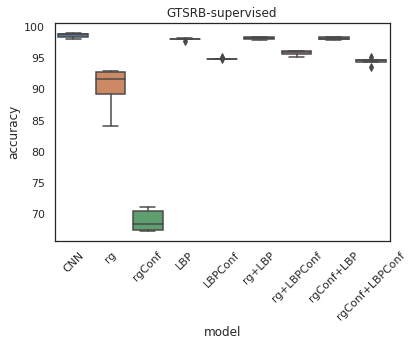

In [7]:
plot_accurracys(dataset = 'gtsrb', p = -1, mode = 'supervised', name='gtrsb_classification')
print()

mode: supervised, name: clustered-gtrsb_classification, dataset: clustered GTSRB
               accuracy            
                   mean   std count
model                              
CNN               99.60  0.07     5
rg                98.90  0.12     5
rgConf            97.92  0.49     5
LBP               99.56  0.15     5
LBPConf           98.46  0.31     5
rg+LBP            99.52  0.08     5
rg+LBPConf        99.36  0.44     5
rgConf+LBP        99.62  0.11     5
rgConf+LBPConf    99.16  0.23     5


/tmp/ipykernel_9654/879237390.py:21: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = (df_plot.drop( # choose experiments


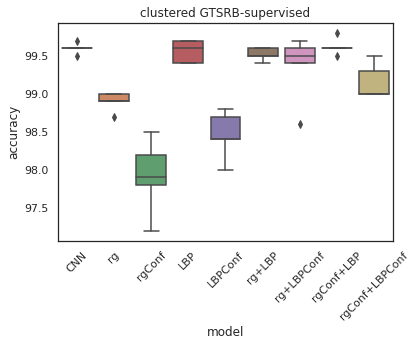

In [8]:
plot_accurracys(dataset = 'gtsrb-small', p = -1, mode = 'supervised', name='clustered-gtrsb_classification')

### unsupervised

mode: unsupervised, name: gtrsb_VAE, dataset: GTSRB
               accuracy             
                   mean    std count
model                               
CNN               66.72   4.44    20
rg                68.30   1.56     5
rgConf            27.82  30.05     5
LBP               86.76   0.92     5
LBPConf           84.46   1.08     5
rg+LBP            86.38   1.36     5
rg+LBPConf        84.08   2.09     5
rgConf+LBP        86.34   0.73     5
rgConf+LBPConf    84.30   2.05     5


/tmp/ipykernel_9654/879237390.py:21: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = (df_plot.drop( # choose experiments


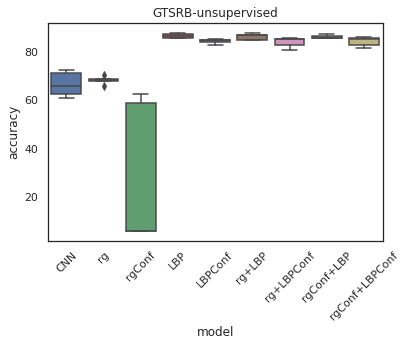

In [9]:
plot_accurracys(dataset = 'gtsrb', p = -1, mode = 'unsupervised', name='gtrsb_VAE')

mode: unsupervised, name: gtrsb_VAE, dataset: clustered GTSRB
               accuracy             
                   mean    std count
model                               
CNN               91.44   1.84     5
rg                97.32   0.38     5
rgConf            54.92  22.41     5
LBP               97.76   0.54     5
LBPConf           97.24   0.38     5
rg+LBP            98.58   0.15     5
rg+LBPConf        97.64   0.85     5
rgConf+LBP        98.20   0.22     4
rgConf+LBPConf    97.26   0.15     5


/tmp/ipykernel_9654/879237390.py:21: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = (df_plot.drop( # choose experiments


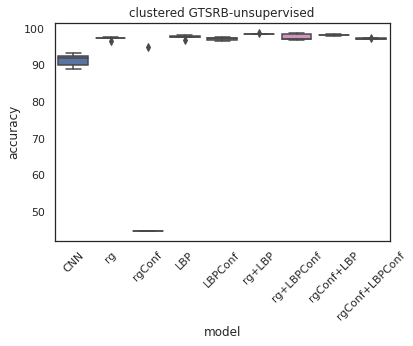

In [10]:
plot_accurracys(dataset = 'gtsrb-small', p = -1, mode = 'unsupervised', name='gtrsb_VAE')

### ocdvae

mode: ocdvae, name: gtrsb_OCDVAE, dataset: GTSRB
               accuracy            
                   mean   std count
model                              
CNN               96.68  0.57     5
rg                86.74  4.09     5
rgConf            86.02  0.39     5
LBP               96.62  0.24     5
LBPConf           95.32  0.28     5
rg+LBP            96.72  0.19     5
rg+LBPConf        95.76  0.11     5
rgConf+LBP        96.64  0.21     5
rgConf+LBPConf    95.68  0.59     5


/tmp/ipykernel_9654/879237390.py:21: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = (df_plot.drop( # choose experiments


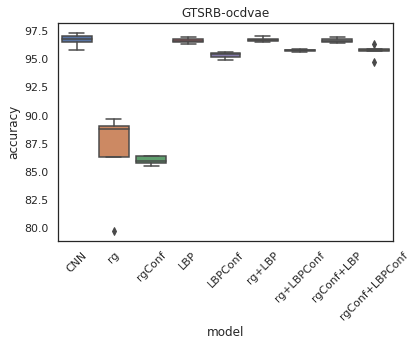

In [11]:
plot_accurracys(dataset = 'gtsrb', p = -1, mode = 'ocdvae', name='gtrsb_OCDVAE')

mode: ocdvae, name: gtrsb_OCDVAE, dataset: clustered GTSRB
               accuracy            
                   mean   std count
model                              
CNN               98.88  0.28     5
rg                98.54  0.25     5
rgConf            98.52  0.23     5
LBP               98.82  0.42     5
LBPConf           98.56  0.18     5
rg+LBP            99.28  0.08     5
rg+LBPConf        99.00  0.12     5
rgConf+LBP        99.32  0.19     5
rgConf+LBPConf    98.98  0.16     5


/tmp/ipykernel_9654/879237390.py:21: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = (df_plot.drop( # choose experiments


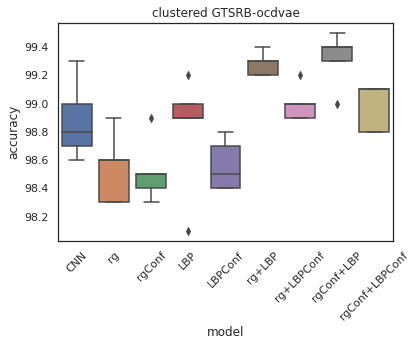

In [12]:
plot_accurracys(dataset = 'gtsrb-small', p = -1, mode = 'ocdvae', name='gtrsb_OCDVAE')

## Reduced samples per class
### GTSRB

In [30]:
def plot_accurracys(dataset, p, mode, name):
    print(F"mode: {mode}, name: {name}, dataset: {possible_datasets[dataset]}")
    
    # remove colums (of the fixed parameters)
    df_plot = results_dfs.loc[(results_dfs['dataset']==dataset )& (results_dfs['p']== p) & (results_dfs['mode']== mode)]
    df_plot = df_plot.sort_values(['model'], key=sort)
    
    # seaborn BOXPLOT
    sns.set(style="white")
    ax = sns.boxplot(data = df_plot, x="model", y="accuracy")
    plt.xticks(rotation=45)
    plt.title(F'{possible_datasets[dataset]}-{mode}'+'' if p==-1 else str(p))
    plt.savefig(os.path.join(outputfolder,F'{name}.pdf'))
    #print(ax.get_xticks())
    #ax.set_xticks(list(ax.get_xticks()), labels=list(models.values())[1:])

    # PRINT STATISTICS & SAVE IN CSV
    output = (df_plot.drop( # choose experiments
                    columns=['p', 'dataset']).groupby(
                    'model').agg(['mean', 'std', 'count']).reindex(list(models.values()))).round(2) # print statistic
    print(output)
    output.to_csv(os.path.join(outputfolder,F'{name}.csv'))
    output['latex']= output[[('accuracy',  'mean'), ('accuracy',   'std')]].astype(str).agg('$\pm$'.join, axis=1)
    results[dataset][F'Accuracy({mode})'] = output['latex'].to_numpy()
    
    
def plot_accurraccys_p(dataset, name, mode='supervised', remove_model =[]):
    sns.set(style="white")
    df = results_dfs.loc[(results_dfs['dataset']==dataset)& (results_dfs['p']>0)]
    df = df.sort_values(['model'], key=sort)
    for model in remove_model:
        df = df[df.model != model]
    g = sns.lineplot(data=df,
                    x="p",
                    y="accuracy",
                    linewidth=2, 
                    hue ="model", 
                    markers = True, 
                    style="model")
    g.set(ylabel='Accuracy', xlabel= "Max number of samples per class")
    g.set_xticks([5,10,50,100], labels=[5,10,50,100])
    plt.savefig(os.path.join(outputfolder,F'{name}.pdf'))

    # SHOW STATISTICS
    results_p = pd.DataFrame(dict(Method = list(models.values())))
    for p in [5,10,50,100]:
        print('p=',p)
        df = results_dfs.loc[(results_dfs['dataset']==dataset) & (results_dfs['p']== p)]
        #df = df[df.model != 'rgConf']
        #print(df)
        output = df.drop( # choose experiments
                    columns=['p', 'dataset']).groupby(# remove colums (of the fixed parameters)
                    'model').agg(['mean', 'std', 'count']).reindex(list(models.values())).round(2) # print statistic
        print(output)
        output.to_csv(os.path.join(outputfolder,F'{name}_{p}.csv'))
        output['latex']= output[[('accuracy',  'mean'), ('accuracy',   'std')]].astype(str).agg('$\pm$'.join, axis=1)
        results_p[F'Accuracy(\#samples={p})'] = output['latex'].to_numpy()
        
    # PRINT STATISTICS & SAVE IN CSV#
    print(results_p)
    print(results_p.to_latex(index=False, escape = False))

p= 5
               accuracy            
                   mean   std count
model                              
CNN               76.16  0.79     5
rg                53.20  1.73     5
rgConf            42.36  0.86     5
LBP               80.24  1.49     5
LBPConf           66.28  1.90     5
rg+LBP            77.60  2.12     5
rg+LBPConf        65.50  2.46     5
rgConf+LBP        79.84  0.76     5
rgConf+LBPConf    68.82  1.91     5
p= 10
               accuracy            
                   mean   std count
model                              
CNN               88.60  0.25     5
rg                62.96  1.07     5
rgConf            44.94  0.94     5
LBP               89.94  0.61     5
LBPConf           75.42  0.76     5
rg+LBP            89.76  0.90     5
rg+LBPConf        76.44  1.68     5
rgConf+LBP        90.72  1.05     5
rgConf+LBPConf    76.38  0.47     5
p= 50
               accuracy            
                   mean   std count
model                              
CNN        

/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experiments
/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experiments
/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experiments
/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experime

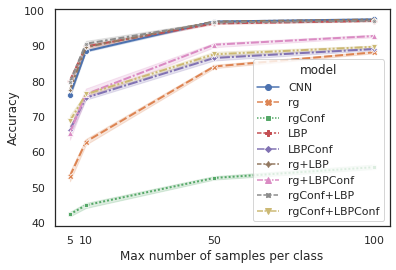

In [31]:
plot_accurraccys_p(dataset='gtsrb', name='gtrsb_limited-samples_classification')

p= 5
               accuracy            
                   mean   std count
model                              
CNN               76.16  0.79     5
rg                53.20  1.73     5
rgConf            42.36  0.86     5
LBP               80.24  1.49     5
LBPConf           66.28  1.90     5
rg+LBP            77.60  2.12     5
rg+LBPConf        65.50  2.46     5
rgConf+LBP        79.84  0.76     5
rgConf+LBPConf    68.82  1.91     5
p= 10
               accuracy            
                   mean   std count
model                              
CNN               88.60  0.25     5
rg                62.96  1.07     5
rgConf            44.94  0.94     5
LBP               89.94  0.61     5
LBPConf           75.42  0.76     5
rg+LBP            89.76  0.90     5
rg+LBPConf        76.44  1.68     5
rgConf+LBP        90.72  1.05     5
rgConf+LBPConf    76.38  0.47     5
p= 50
               accuracy            
                   mean   std count
model                              
CNN        

/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experiments
/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experiments
/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experiments
/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experime

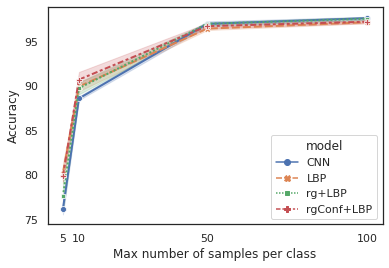

In [32]:
plot_accurraccys_p(dataset='gtsrb', name='gtrsb_limited-samples_classification_best_models', remove_model =['rgConf', 'LBPConf','rg', 'rgConf+LBPConf', 'rg+LBPConf'])

p= 5
               accuracy            
                   mean   std count
model                              
CNN               96.52  0.50     5
rg                96.02  0.30     5
rgConf            93.00  0.60     5
LBP               97.28  0.75     5
LBPConf           90.84  0.41     5
rg+LBP            98.04  0.30     5
rg+LBPConf        97.12  0.25     5
rgConf+LBP        98.24  0.36     5
rgConf+LBPConf    96.20  0.46     5
p= 10
               accuracy            
                   mean   std count
model                              
CNN               97.52  0.26     5
rg                96.22  0.55     5
rgConf            94.56  0.88     5
LBP               97.92  0.25     5
LBPConf           93.68  0.64     5
rg+LBP            98.38  0.30     5
rg+LBPConf        97.38  0.38     5
rgConf+LBP        98.70  0.28     5
rgConf+LBPConf    96.92  0.43     5
p= 50
               accuracy            
                   mean   std count
model                              
CNN        

/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experiments
/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experiments
/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experiments
/tmp/ipykernel_9654/1479020035.py:51: FutureWarning: ['mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  output = df.drop( # choose experime

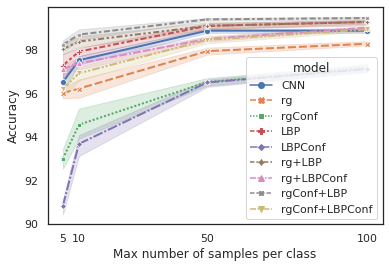

In [33]:
plot_accurraccys_p(dataset='gtsrb-small', name='gtrsb-small_limited-samples_classification')
    

In [ ]:
plot_accurraccys_p(dataset='gtsrb-small', name='gtrsb-small_limited-samples_classification_best_models', remove_model =['rgConf', 'LBPConf','rg', 'rgConf+LBPConf', 'rg+LBPConf'])

In [19]:
print(results['gtsrb'])
print(results['gtsrb'].to_latex(index=False, escape = False))

           Method Accuracy(supervised) Accuracy(unsupervised) Accuracy(ocdvae)
0             CNN       98.62$\pm$0.41         66.72$\pm$4.44   96.68$\pm$0.57
1              rg       90.14$\pm$3.67          68.3$\pm$1.56   86.74$\pm$4.09
2          rgConf        69.0$\pm$1.74        27.82$\pm$30.05   86.02$\pm$0.39
3             LBP        98.0$\pm$0.19         86.76$\pm$0.92   96.62$\pm$0.24
4         LBPConf       94.92$\pm$0.11         84.46$\pm$1.08   95.32$\pm$0.28
5          rg+LBP       98.16$\pm$0.26         86.38$\pm$1.36   96.72$\pm$0.19
6      rg+LBPConf       95.82$\pm$0.38         84.08$\pm$2.09   95.76$\pm$0.11
7      rgConf+LBP       98.12$\pm$0.18         86.34$\pm$0.73   96.64$\pm$0.21
8  rgConf+LBPConf       94.44$\pm$0.59          84.3$\pm$2.05   95.68$\pm$0.59
\begin{tabular}{llll}
\toprule
        Method & Accuracy(supervised) & Accuracy(unsupervised) & Accuracy(ocdvae) \\
\midrule
           CNN &       98.62$\pm$0.41 &         66.72$\pm$4.44 &   96.68$\pm$0.57 \\


/tmp/ipykernel_9654/4099137979.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results['gtsrb'].to_latex(index=False, escape = False))


In [ ]:
print(results['gtsrb-small'])
print(results['gtsrb-small'].to_latex(index=False, escape = False))

* Lbp conf ist nicht überzeugend
* LBP scheint ein starker operator auf dem dem set zu sein

* Experimente in ordner verschieben